In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Train / Test
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, StratifiedKFold

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, precision_score, recall_score

In [2]:
df = pd.read_csv('Violence_Reduction_-_Victims_of_Homicides_and_Non-Fatal_Shootings.csv')
df

C:\Users\Maxim\AppData\Local\Temp\ipykernel_26108\1653719020.py:1: DtypeWarning: Columns (25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Violence_Reduction_-_Victims_of_Homicides_and_Non-Fatal_Shootings.csv')


,CASE_NUMBER,DATE,BLOCK,VICTIMIZATION_PRIMARY,INCIDENT_PRIMARY,GUNSHOT_INJURY_I,UNIQUE_ID,ZIP_CODE,WARD,COMMUNITY_AREA,...,MONTH,DAY_OF_WEEK,HOUR,LOCATION_DESCRIPTION,STATE_HOUSE_DISTRICT,STATE_SENATE_DISTRICT,UPDATED,LATITUDE,LONGITUDE,LOCATION
0,JF167335,03/08/2022 03:27:00 PM,6000 N KENMORE AVE,HOMICIDE,HOMICIDE,NO,HOM-JF167335-#1,60660.0,48.0,EDGEWATER,...,3,3,15,APARTMENT,14.0,7.0,02/24/2023 05:55:43 AM,41.990570,-87.657000,POINT (-87.657 41.9905705)
1,JG148375,02/11/2023 02:30:00 AM,8400 S WABASH AVE,HOMICIDE,HOMICIDE,YES,HOM-JG148375-#1,60619.0,6.0,CHATHAM,...,2,7,2,ALLEY,34.0,17.0,02/12/2023 05:09:11 AM,41.739900,-87.622860,POINT (-87.62286 41.7399005)
2,JH242715,04/28/2024 10:54:00 PM,8800 S BURLEY AVE,HOMICIDE,HOMICIDE,YES,HOM-JH242715-#1,60617.0,10.0,SOUTH CHICAGO,...,4,1,22,STREET,25.0,13.0,04/30/2024 05:26:32 AM,41.733280,-87.545900,POINT (-87.5459 41.7332805)
3,JH277922,05/25/2024 12:35:00 AM,5800 S PRAIRIE AVE,BATTERY,BATTERY,YES,SHOOT-JH277922-#1,60637.0,20.0,WASHINGTON PARK,...,5,7,0,ALLEY,5.0,3.0,10/18/2025 12:38:05 AM,41.787758,-87.618465,POINT (-87.61846465388 41.787758345858)
4,JJ293685,06/13/2025 11:41:00 PM,100 N LARAMIE AVE,HOMICIDE,HOMICIDE,YES,HOM-JJ293685-#1,60644.0,28.0,AUSTIN,...,6,6,23,AUTO,8.0,4.0,06/14/2025 05:58:03 AM,41.883280,-87.755050,POINT (-87.75505 41.8832805)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62777,JJ405076,09/07/2025 05:23:00 AM,3500 S ARCHER AVE,HOMICIDE,HOMICIDE,YES,HOM-JJ405076-#1,NaN,NaN,NaN,...,9,1,5,CTA PROPERTY,NaN,NaN,09/13/2025 05:06:13 AM,NaN,NaN,NaN
62778,JJ397241,09/01/2025 01:04:00 AM,3600 S COTTAGE GROVE AVE,BATTERY,BATTERY,YES,SHOOT-JJ397241-#4,60653.0,4.0,OAKLAND,...,9,2,1,STREET,26.0,13.0,09/03/2025 09:55:14 AM,41.829193,-87.608901,POINT (-87.608900941301 41.829193095858)
62779,JJ405834,09/07/2025 07:08:00 PM,12400 S STEWART AVE,BATTERY,BATTERY,YES,SHOOT-JJ405834-#1,60628.0,9.0,WEST PULLMAN,...,9,1,19,RESIDENCE - PORCH / HALLWAY,28.0,14.0,09/29/2025 11:28:49 PM,41.668047,-87.631851,POINT (-87.631850941301 41.668046904142)
62780,JJ399831,09/02/2025 10:29:00 PM,2500 S KEELER AVE,BATTERY,BATTERY,YES,SHOOT-JJ399831-#1,60623.0,22.0,SOUTH LAWNDALE,...,9,3,22,STREET,24.0,12.0,09/15/2025 11:51:03 AM,41.845053,-87.729011,POINT (-87.729010941301 41.845053095858)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62782 entries, 0 to 62781
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CASE_NUMBER                   62782 non-null  object 
 1   DATE                          62782 non-null  object 
 2   BLOCK                         62782 non-null  object 
 3   VICTIMIZATION_PRIMARY         62782 non-null  object 
 4   INCIDENT_PRIMARY              62782 non-null  object 
 5   GUNSHOT_INJURY_I              62782 non-null  object 
 6   UNIQUE_ID                     62782 non-null  object 
 7   ZIP_CODE                      62757 non-null  float64
 8   WARD                          62757 non-null  float64
 9   COMMUNITY_AREA                62757 non-null  object 
 10  STREET_OUTREACH_ORGANIZATION  45750 non-null  object 
 11  AREA                          62757 non-null  float64
 12  DISTRICT                      62757 non-null  float64
 13  B

## ---------------------------------------------------------

#### Creation of the Target Variable: Whether the Incident Was a Homicide

In [4]:
df["y_fatal"] = (df["VICTIMIZATION_PRIMARY"] == "HOMICIDE").astype(int)
df.head()

,CASE_NUMBER,DATE,BLOCK,VICTIMIZATION_PRIMARY,INCIDENT_PRIMARY,GUNSHOT_INJURY_I,UNIQUE_ID,ZIP_CODE,WARD,COMMUNITY_AREA,...,DAY_OF_WEEK,HOUR,LOCATION_DESCRIPTION,STATE_HOUSE_DISTRICT,STATE_SENATE_DISTRICT,UPDATED,LATITUDE,LONGITUDE,LOCATION,y_fatal
0,JF167335,03/08/2022 03:27:00 PM,6000 N KENMORE AVE,HOMICIDE,HOMICIDE,NO,HOM-JF167335-#1,60660.0,48.0,EDGEWATER,...,3,15,APARTMENT,14.0,7.0,02/24/2023 05:55:43 AM,41.990570,-87.657000,POINT (-87.657 41.9905705),1
1,JG148375,02/11/2023 02:30:00 AM,8400 S WABASH AVE,HOMICIDE,HOMICIDE,YES,HOM-JG148375-#1,60619.0,6.0,CHATHAM,...,7,2,ALLEY,34.0,17.0,02/12/2023 05:09:11 AM,41.739900,-87.622860,POINT (-87.62286 41.7399005),1
2,JH242715,04/28/2024 10:54:00 PM,8800 S BURLEY AVE,HOMICIDE,HOMICIDE,YES,HOM-JH242715-#1,60617.0,10.0,SOUTH CHICAGO,...,1,22,STREET,25.0,13.0,04/30/2024 05:26:32 AM,41.733280,-87.545900,POINT (-87.5459 41.7332805),1
3,JH277922,05/25/2024 12:35:00 AM,5800 S PRAIRIE AVE,BATTERY,BATTERY,YES,SHOOT-JH277922-#1,60637.0,20.0,WASHINGTON PARK,...,7,0,ALLEY,5.0,3.0,10/18/2025 12:38:05 AM,41.787758,-87.618465,POINT (-87.61846465388 41.787758345858),0
4,JJ293685,06/13/2025 11:41:00 PM,100 N LARAMIE AVE,HOMICIDE,HOMICIDE,YES,HOM-JJ293685-#1,60644.0,28.0,AUSTIN,...,6,23,AUTO,8.0,4.0,06/14/2025 05:58:03 AM,41.883280,-87.755050,POINT (-87.75505 41.8832805),1


#### Validation Checks for the Target Variable Construction

In [5]:
suspect_1 = df[
    (df["y_fatal"] == 0) &
    (df["HOMICIDE_VICTIM_FIRST_NAME"].notna())
]

suspect_1[[
    "VICTIMIZATION_PRIMARY",
    "HOMICIDE_VICTIM_FIRST_NAME"
]].head()

,VICTIMIZATION_PRIMARY,HOMICIDE_VICTIM_FIRST_NAME


In [6]:
suspect_2 = df[
    (df["y_fatal"] == 1) &
    (df["HOMICIDE_VICTIM_FIRST_NAME"].isna())
]

suspect_2.shape

(9, 39)

In [84]:
mismatch_1 = df[
    (df["VICTIMIZATION_PRIMARY"] == "HOMICIDE") &
    (df["INCIDENT_PRIMARY"] != "HOMICIDE")
]

print(f"Fatal victims in non-homicide incidents: {len(mismatch_1)}")

Fatal victims in non-homicide incidents: 0


### ---------------------------

### Delete Columns
### After defining the target variable, columns that directly encode the type of crime or victim outcome were removed to prevent label leakage. Additional non-informative and personally identifiable columns were excluded to ensure that the models learn from contextual, temporal, and demographic features only.

In [10]:
cols_to_drop = [
    # קביעת סוג פשע / תוצאת קורבן (Data Leakage)
    "VICTIMIZATION_PRIMARY",
    "INCIDENT_PRIMARY",
    "VICTIMIZATION_FBI_CD",
    "INCIDENT_FBI_CD",
    "VICTIMIZATION_FBI_DESCR",
    "INCIDENT_FBI_DESCR",
    "VICTIMIZATION_IUCR_CD",
    "INCIDENT_IUCR_CD",
    "VICTIMIZATION_IUCR_SECONDARY",
    "INCIDENT_IUCR_SECONDARY",
    "GUNSHOT_INJURY_I",
    

    # פרטים מזהים
    "HOMICIDE_VICTIM_FIRST_NAME",
    "HOMICIDE_VICTIM_MI",
    "HOMICIDE_VICTIM_LAST_NAME",

    # מזהים טכניים
    "CASE_NUMBER",
    "UNIQUE_ID",

    # כפילויות / מידע מערכת
    "LOCATION",
    "UPDATED",

    # עמודות טקסט חופשיות
    "BLOCK",
    "STREET_OUTREACH_ORGANIZATION",
    "DATE",

    # מזהי מיקום בדידים 
    "ZIP_CODE",
    "WARD",
    "BEAT"

]

df_model = df.drop(
    columns=[c for c in cols_to_drop if c in df.columns],
    errors="ignore"
)

df_model

,COMMUNITY_AREA,AREA,DISTRICT,AGE,SEX,RACE,MONTH,DAY_OF_WEEK,HOUR,LOCATION_DESCRIPTION,STATE_HOUSE_DISTRICT,STATE_SENATE_DISTRICT,LATITUDE,LONGITUDE,y_fatal
0,EDGEWATER,3.0,24.0,60-69,M,BLK,3,3,15,APARTMENT,14.0,7.0,41.990570,-87.657000,1
1,CHATHAM,2.0,6.0,20-29,M,API,2,7,2,ALLEY,34.0,17.0,41.739900,-87.622860,1
2,SOUTH CHICAGO,2.0,4.0,30-39,M,BLK,4,1,22,STREET,25.0,13.0,41.733280,-87.545900,1
3,WASHINGTON PARK,1.0,2.0,0-19,M,BLK,5,7,0,ALLEY,5.0,3.0,41.787758,-87.618465,0
4,AUSTIN,4.0,15.0,30-39,M,BLK,6,6,23,AUTO,8.0,4.0,41.883280,-87.755050,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62777,NaN,NaN,NaN,20-29,M,BLK,9,1,5,CTA PROPERTY,NaN,NaN,NaN,NaN,1
62778,OAKLAND,1.0,2.0,30-39,F,BLK,9,2,1,STREET,26.0,13.0,41.829193,-87.608901,0
62779,WEST PULLMAN,2.0,5.0,50-59,F,BLK,9,1,19,RESIDENCE - PORCH / HALLWAY,28.0,14.0,41.668047,-87.631851,0
62780,SOUTH LAWNDALE,4.0,10.0,40-49,F,WWH,9,3,22,STREET,24.0,12.0,41.845053,-87.729011,0


In [11]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62782 entries, 0 to 62781
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   COMMUNITY_AREA         62757 non-null  object 
 1   AREA                   62757 non-null  float64
 2   DISTRICT               62757 non-null  float64
 3   AGE                    62782 non-null  object 
 4   SEX                    62782 non-null  object 
 5   RACE                   62782 non-null  object 
 6   MONTH                  62782 non-null  int64  
 7   DAY_OF_WEEK            62782 non-null  int64  
 8   HOUR                   62782 non-null  int64  
 9   LOCATION_DESCRIPTION   62782 non-null  object 
 10  STATE_HOUSE_DISTRICT   62755 non-null  float64
 11  STATE_SENATE_DISTRICT  62755 non-null  float64
 12  LATITUDE               62757 non-null  float64
 13  LONGITUDE              62757 non-null  float64
 14  y_fatal                62782 non-null  int64  
dtypes:

In [12]:
df_model.isnull().sum()

COMMUNITY_AREA           25
AREA                     25
DISTRICT                 25
AGE                       0
SEX                       0
RACE                      0
MONTH                     0
DAY_OF_WEEK               0
HOUR                      0
LOCATION_DESCRIPTION      0
STATE_HOUSE_DISTRICT     27
STATE_SENATE_DISTRICT    27
LATITUDE                 25
LONGITUDE                25
y_fatal                   0
dtype: int64

##### Missing value analysis showed a negligible amount of missing data (less than 0.1% across all features), primarily in spatial attributes. Therefore, all features were retained, and missing values were handled during model training using appropriate imputation strategies.

### -----------------------------------------------------------

### Feature Engineering

#### Reducing Cardinality of LOCATION_DESCRIPTION

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
print("Unique LOCATION_DESCRIPTION (before):",
      df_model["LOCATION_DESCRIPTION"].nunique())
# בחירת N הערכים השכיחים ביותר
TOP_N = 30
top_locations = (
    df_model["LOCATION_DESCRIPTION"]
    .value_counts()
    .head(TOP_N)
    .index
)
# החלפת כל השאר ל-"OTHER"
df_model["LOCATION_DESCRIPTION"] = (
    df_model["LOCATION_DESCRIPTION"]
    .where(df_model["LOCATION_DESCRIPTION"].isin(top_locations), "OTHER")
)

print("Unique LOCATION_DESCRIPTION (after):",
      df_model["LOCATION_DESCRIPTION"].nunique())
print("\nDistribution after grouping:")
print(df_model["LOCATION_DESCRIPTION"].value_counts())

Unique LOCATION_DESCRIPTION (before): 186
Unique LOCATION_DESCRIPTION (after): 30

Distribution after grouping:
LOCATION_DESCRIPTION
STREET                                    25426
SIDEWALK                                  12809
ALLEY                                      3887
APARTMENT                                  3467
OTHER                                      3195
AUTO                                       2613
RESIDENCE                                  1264
HOUSE                                      1075
RESIDENCE PORCH/HALLWAY                     953
VEHICLE NON-COMMERCIAL                      886
GAS STATION                                 808
PARK PROPERTY                               760
PORCH                                       655
YARD                                        523
RESIDENTIAL YARD (FRONT/BACK)               498
PARKING LOT                                 468
PARKING LOT / GARAGE (NON RESIDENTIAL)      421
PARKING LOT/GARAGE(NON.RESID.)              398
RES

#### Casting Numeric Location Identifiers as Categorical Features

In [14]:
categorical_as_id = [
    "STATE_SENATE_DISTRICT",
    "STATE_HOUSE_DISTRICT",
    "DISTRICT",
    "AREA"
]

for col in categorical_as_id:
    if col in df_model.columns:
        df_model[col] = df_model[col].astype("object")

#### Feature Engineering Attempts Without Performance Improvement

In [ ]:
'''# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
# --- 1) IS_NIGHT: 22:00 עד 05:59 ---
# לילה = שעות 22,23,0,1,2,3,4,5
df_model["IS_NIGHT"] = df_model["HOUR"].isin([22, 23, 0, 1, 2, 3, 4, 5]).astype(int)

# --- 2) IS_WEEKEND: שישי/שבת/ראשון לפי המספור שלך 1,6,7 ---
df_model["IS_WEEKEND"] = df_model["DAY_OF_WEEK"].isin([1, 6, 7]).astype(int)

# --- 3) SEASON: לפי שיקגו (מטאורולוגי) ---
# Winter: Dec-Feb (12,1,2)
# Spring: Mar-May (3,4,5)
# Summer: Jun-Aug (6,7,8)
# Fall:   Sep-Nov (9,10,11)

def month_to_season_chicago(m):
    if pd.isna(m):
        return np.nan
    m = int(m)
    if m in [12, 1, 2]:
        return "Winter"
    elif m in [3, 4, 5]:
        return "Spring"
    elif m in [6, 7, 8]:
        return "Summer"
    elif m in [9, 10, 11]:
        return "Fall"
    else:
        return np.nan

df_model["SEASON"] = df_model["MONTH"].apply(month_to_season_chicago)'''

'# --- 1) IS_NIGHT: 22:00 עד 05:59 ---\n# לילה = שעות 22,23,0,1,2,3,4,5\ndf_model["IS_NIGHT"] = df_model["HOUR"].isin([22, 23, 0, 1, 2, 3, 4, 5]).astype(int)\n\n# --- 2) IS_WEEKEND: שישי/שבת/ראשון לפי המספור שלך 1,6,7 ---\ndf_model["IS_WEEKEND"] = df_model["DAY_OF_WEEK"].isin([1, 6, 7]).astype(int)\n\n# --- 3) SEASON: לפי שיקגו (מטאורולוגי) ---\n# Winter: Dec-Feb (12,1,2)\n# Spring: Mar-May (3,4,5)\n# Summer: Jun-Aug (6,7,8)\n# Fall:   Sep-Nov (9,10,11)\n\ndef month_to_season_chicago(m):\n    if pd.isna(m):\n        return np.nan\n    m = int(m)\n    if m in [12, 1, 2]:\n        return "Winter"\n    elif m in [3, 4, 5]:\n        return "Spring"\n    elif m in [6, 7, 8]:\n        return "Summer"\n    elif m in [9, 10, 11]:\n        return "Fall"\n    else:\n        return np.nan\n\ndf_model["SEASON"] = df_model["MONTH"].apply(month_to_season_chicago)'

### ---------------------------------------

# Class Balance

In [16]:
df_model["y_fatal"].value_counts(normalize=True) * 100

y_fatal
0    65.12854
1    34.87146
Name: proportion, dtype: float64

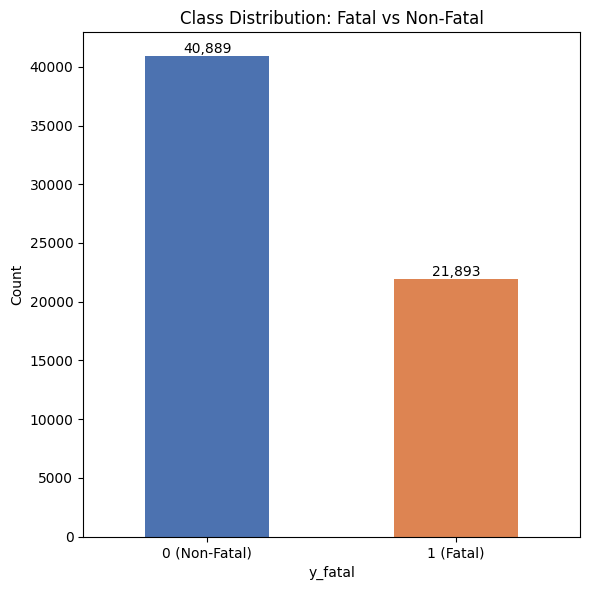

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
counts = df_model["y_fatal"].value_counts().sort_index()

plt.figure(figsize=(6, 6))
ax = counts.plot(kind="bar", color=["#4C72B0", "#DD8452"])

plt.title("Class Distribution: Fatal vs Non-Fatal")
plt.xlabel("y_fatal")
plt.ylabel("Count")
plt.xticks([0, 1], ["0 (Non-Fatal)", "1 (Fatal)"], rotation=0)

for i, v in enumerate(counts):
    ax.text(i, v, f"{v:,}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

##### The target variable is moderately imbalanced, with fatal cases representing about 35% of the data.

### -------------------------------

# EDA

##### Distribution of Fatal and Non-Fatal Incidents by Age Group 

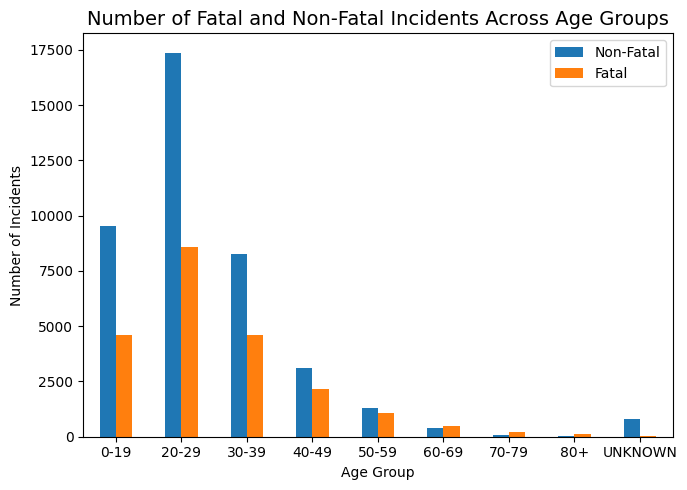

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
ct = pd.crosstab(df_model["AGE"], df_model["y_fatal"])
ct.plot(kind="bar", figsize=(7,5))
plt.title("Number of Fatal and Non-Fatal Incidents Across Age Groups", fontsize=14)
plt.xticks(rotation=0)
plt.xlabel("Age Group")
plt.ylabel("Number of Incidents")
plt.legend(["Non-Fatal", "Fatal"])
plt.tight_layout()
plt.show()


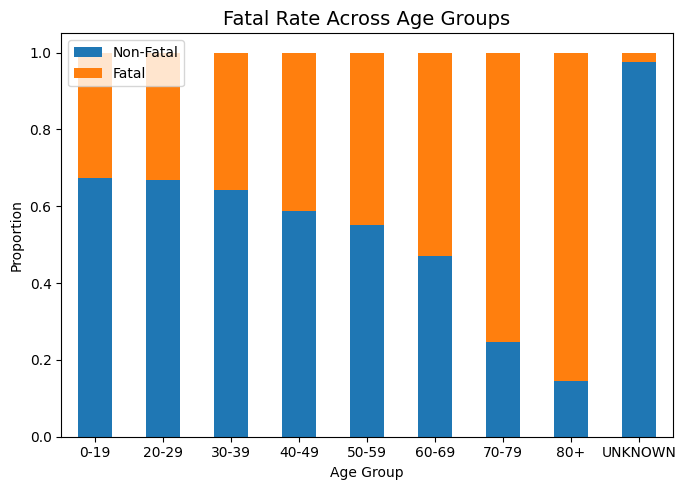

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
ct_norm = pd.crosstab(
    df_model["AGE"],
    df_model["y_fatal"],
    normalize="index"
)
ct_norm.plot(kind="bar", stacked=True, figsize=(7,5))
plt.title("Fatal Rate Across Age Groups",fontsize=14)
plt.xticks(rotation=0)
plt.xlabel("Age Group")
plt.ylabel("Proportion")
plt.legend(["Non-Fatal", "Fatal"])
plt.tight_layout()
plt.show()

##### Incidents are concentrated among younger ages, while fatal outcomes are more common in older age groups.

### -----------------------------------------

### Distribution of Fatal and Non-Fatal Incidents by hour of the day

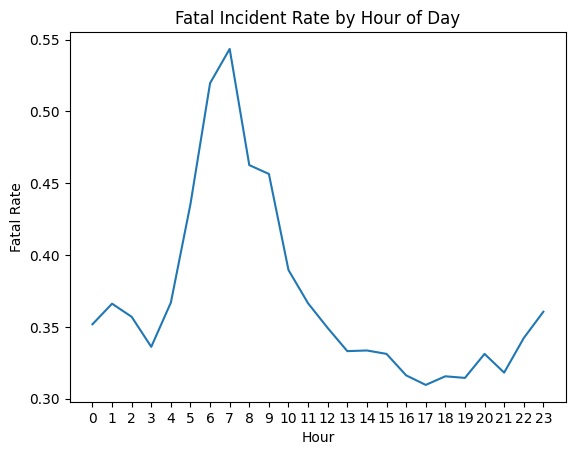

In [ ]:
hourly_fatal_rate = df_model.groupby("HOUR")["y_fatal"].mean()
hourly_fatal_rate.plot()
plt.title("Fatal Incident Rate by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Fatal Rate")
plt.xticks(range(0, 24))
plt.show()

##### The fatal incident rate varies throughout the day, with a pronounced peak during the early morning hours (approximately 5 AM to 10 AM). Rates decline steadily during daytime hours and show a slight increase again late at night.


### ----------------------------

### Fatal Incident Rate by Sex

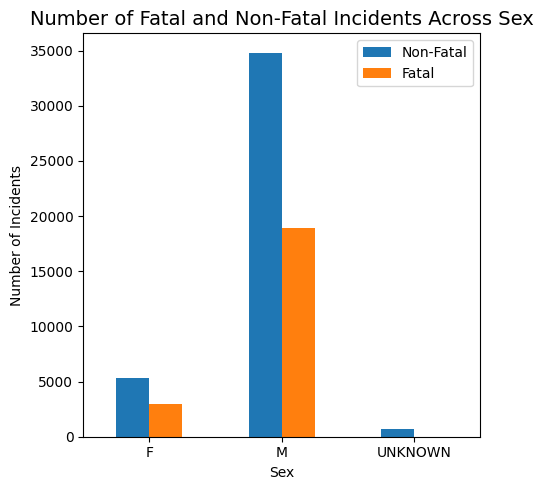

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
ct = pd.crosstab(df_model["SEX"], df_model["y_fatal"])
ct.plot(kind="bar", figsize=(5,5))
plt.title("Number of Fatal and Non-Fatal Incidents Across Sex", fontsize=14)
plt.xticks(rotation=0)
plt.xlabel("Sex")
plt.ylabel("Number of Incidents")
plt.legend(["Non-Fatal", "Fatal"])
plt.tight_layout()
plt.show()

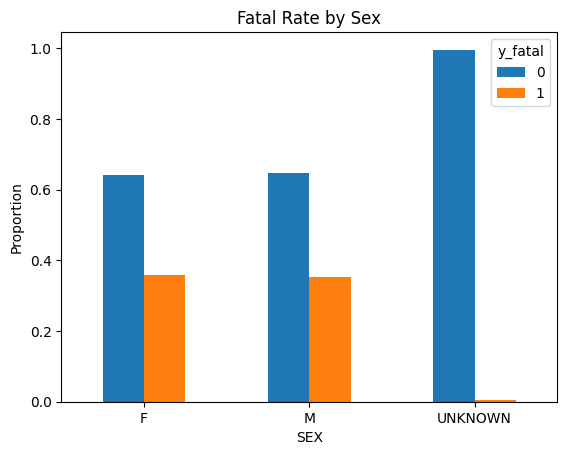

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
pd.crosstab(df_model["SEX"], df_model["y_fatal"], normalize="index").plot(kind="bar")
plt.title("Fatal Rate by Sex")
plt.xticks(rotation=0)
plt.ylabel("Proportion")
plt.show()

##### Male victims account for a significantly higher number of incidents overall. However, when considering proportions, the fatal vs. non-fatal distribution is similar for males and females, while the UNKNOWN category is negligible.

### ----------------------------

### Incidents and Fatality Rates by Day of Week

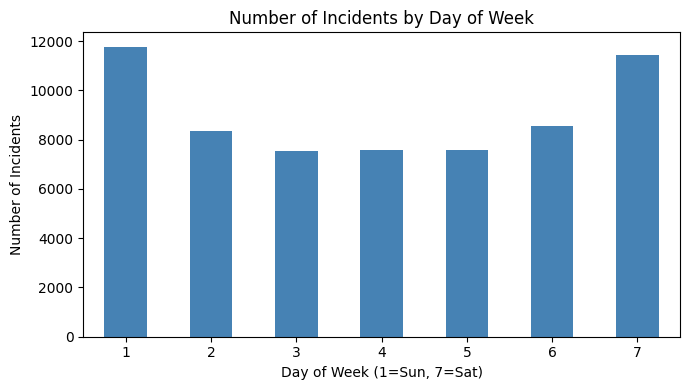

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
day_counts = df_model["DAY_OF_WEEK"].value_counts().sort_index()

plt.figure(figsize=(7, 4))
day_counts.plot(kind="bar", color="steelblue")

plt.title("Number of Incidents by Day of Week")
plt.xlabel("Day of Week (1=Sun, 7=Sat)")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

##### Incident frequency is higher during weekends, with peaks on Saturday and Sunday, while weekdays show consistently lower incident counts.


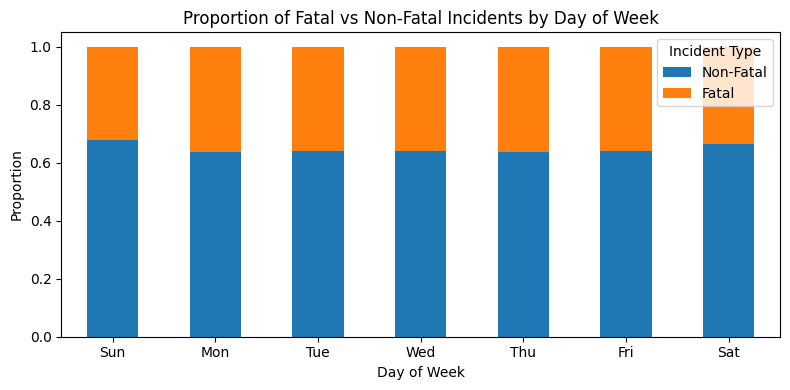

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
day_fatal_pct = (
    pd.crosstab(df_model["DAY_OF_WEEK"], df_model["y_fatal"], normalize="index")
)

plt.figure(figsize=(8, 4))
day_fatal_pct.plot(kind="bar", stacked=True, ax=plt.gca())

plt.title("Proportion of Fatal vs Non-Fatal Incidents by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Proportion")

plt.xticks(
    ticks=range(len(day_fatal_pct.index)),
    labels=["Sun","Mon", "Tue", "Wed", "Thu", "Fri", "Sat"],
    rotation=0
)

plt.legend(["Non-Fatal", "Fatal"], title="Incident Type")
plt.tight_layout()
plt.show()

##### While the total number of incidents increases on weekends, the fatal-to-non-fatal ratio remains largely consistent throughout the week.

### ---------------------------------

### Incident and Fatality Counts by Location Type

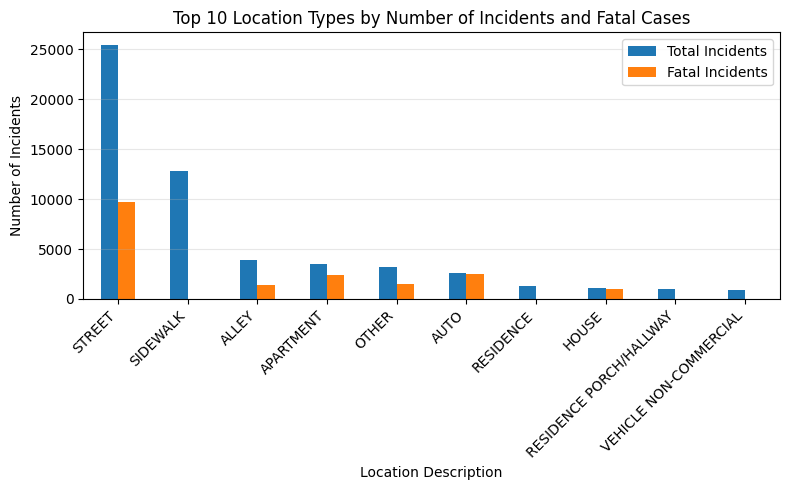

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
location_stats = (
    df_model
    .groupby("LOCATION_DESCRIPTION")
    .agg(
        total_events=("y_fatal", "count"),
        fatal_events=("y_fatal", "sum")
    )
)
top_locations = (
    location_stats
    .sort_values("total_events", ascending=False)
    .head(10)
)
top_locations[["total_events", "fatal_events"]].plot(
    kind="bar",
    figsize=(8, 5)
)
plt.title("Top 10 Location Types by Number of Incidents and Fatal Cases")
plt.xlabel("Location Description")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45, ha="right")
plt.legend(["Total Incidents", "Fatal Incidents"])
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


#### Most violent incidents occur in public spaces, particularly on streets and sidewalks. Streets account for the highest number of both total and fatal incidents, while other location types show substantially lower volumes.

### ---------------------------------

### High-Activity Areas: Incident Volume and Fatality Rate

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
top_areas = (
    df_model["COMMUNITY_AREA"]
    .value_counts()
    .head(20)
    .index
)

hotspot_stats = (
    df_model[df_model["COMMUNITY_AREA"].isin(top_areas)]
    .groupby("COMMUNITY_AREA")
    .agg(
        total_incidents=("y_fatal", "size"),
        fatal_rate=("y_fatal", "mean")
    )
    .sort_values("total_incidents", ascending=False)
)

hotspot_stats

,total_incidents,fatal_rate
COMMUNITY_AREA,,
AUSTIN,5272,0.334977
NORTH LAWNDALE,3057,0.298659
HUMBOLDT PARK,2894,0.345888
WEST ENGLEWOOD,2834,0.315808
ENGLEWOOD,2709,0.338870
SOUTH SHORE,2548,0.358713
AUBURN GRESHAM,2398,0.322769
GREATER GRAND CROSSING,2381,0.314154
WEST GARFIELD PARK,2331,0.314886


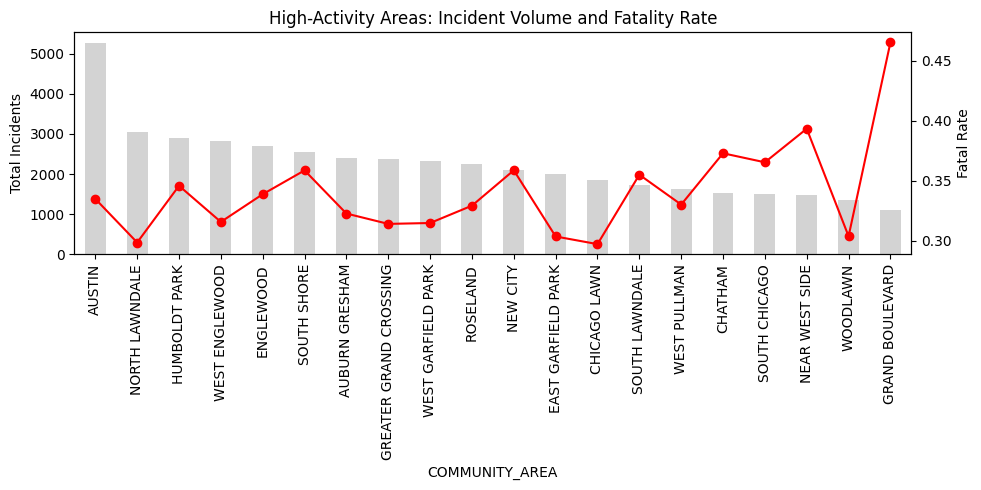

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
fig, ax1 = plt.subplots(figsize=(10,5))

# Bar plot – total incidents
hotspot_stats["total_incidents"].plot(
    kind="bar",
    ax=ax1,
    color="lightgray",
    label="Total Incidents"
)
ax1.set_ylabel("Total Incidents")

# Line plot – fatal rate
ax2 = ax1.twinx()
hotspot_stats["fatal_rate"].plot(
    color="red",
    marker="o",
    ax=ax2,
    label="Fatal Rate"
)
ax2.set_ylabel("Fatal Rate")
ax1.set_title("High-Activity Areas: Incident Volume and Fatality Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Among the community areas with the highest number of incidents, notable variation in fatality rates is observed. While some high-activity areas exhibit relatively low fatal outcome rates, others combine both high incident volume and elevated fatality rates. This suggests that spatial factors may influence not only the frequency but also the severity of violent incidents.

### ------------------------------------

# Pipline + Models


### Split + Preprocessing 

In [ ]:
X = df_model.drop(columns=["y_fatal"])
y = df_model["y_fatal"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = [c for c in X.columns if c not in numeric_features]

print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

Numeric: ['MONTH', 'DAY_OF_WEEK', 'HOUR', 'LATITUDE', 'LONGITUDE']
Categorical: ['COMMUNITY_AREA', 'AREA', 'DISTRICT', 'AGE', 'SEX', 'RACE', 'LOCATION_DESCRIPTION', 'STATE_HOUSE_DISTRICT', 'STATE_SENATE_DISTRICT']


### Transformers + Pipelines 

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
numeric_transformer_scaled = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

numeric_transformer_noscale = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
preprocessor_scaled = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_scaled, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

preprocessor_noscale = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_noscale, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
pipelines = {
    "Random Forest": Pipeline(steps=[
        ("preprocessor", preprocessor_noscale),
        ("model", RandomForestClassifier(
            n_estimators=100,             
            class_weight='balanced',      
            random_state=42,
            n_jobs=-1
        ))
    ]),

    "AdaBoost": Pipeline(steps=[
        ("preprocessor", preprocessor_noscale),
        ("model", AdaBoostClassifier(
            n_estimators=100,             
            random_state=42
        ))
    ]),

    "Gradient Boosting": Pipeline(steps=[
        ("preprocessor", preprocessor_noscale),
        ("model", GradientBoostingClassifier(
            n_estimators=100,             
            random_state=42
        ))
    ]),

    "XGBoost": Pipeline(steps=[
        ("preprocessor", preprocessor_noscale),
        ("model", XGBClassifier(
            n_estimators=100,             
            scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),          
            eval_metric="logloss",
            random_state=42,
            n_jobs=-1
        ))
    ]),

    "Neural Network (MLP)": Pipeline(steps=[
        ("preprocessor", preprocessor_scaled), 
        ("model", MLPClassifier(
            hidden_layer_sizes=(100,),    
            max_iter=500,                 
            early_stopping=True,          
            random_state=42
        ))
    ])
}

### Baseline Comparison (CV)

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

baseline_results = []

for name, pipe in pipelines.items():
    scores = cross_validate(
        estimator=pipe,
        X=X_train,
        y=y_train,
        cv=cv,
        scoring=["accuracy", "f1", "roc_auc", "recall", "precision"],
        n_jobs=-1
    )

    baseline_results.append({
        "Model": name,
        "Accuracy (CV)": scores["test_accuracy"].mean(),
        "F1 (CV)": scores["test_f1"].mean(),
        "Precision (CV)": scores["test_precision"].mean(), 
        "Recall (CV)": scores["test_recall"].mean(),      
        "ROC_AUC (CV)": scores["test_roc_auc"].mean()
    })

baseline_df = (
    pd.DataFrame(baseline_results)
    .sort_values("F1 (CV)", ascending=False)
    .reset_index(drop=True)
)

baseline_df

,Model,Accuracy (CV),F1 (CV),Precision (CV),Recall (CV),ROC_AUC (CV)
0,XGBoost,0.722748,0.679806,0.569124,0.844011,0.857145
1,Random Forest,0.768183,0.631581,0.708359,0.569830,0.855320
2,Neural Network (MLP),0.768442,0.601640,0.753046,0.501656,0.850058
3,Gradient Boosting,0.769676,0.552899,0.855754,0.408416,0.842862
4,AdaBoost,0.734555,0.437875,0.837175,0.296506,0.777402


##### Based on cross-validation results, XGBoost and Random Forest demonstrated the strongest overall performance, with the highest F1 scores and strong ROC-AUC values. Additionally, the two models exhibited complementary precision–recall trade-offs, making them well-suited for further hyperparameter tuning and detailed evaluation.

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
# Final evaluation function:
# Trains the selected model on the training set and evaluates performance on the test set
# using Accuracy, Precision, Recall, F1-score, ROC-AUC, and Confusion Matrix.
def evaluate_pipeline(name, pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    if hasattr(pipeline, "predict_proba"):
        y_prob = pipeline.predict_proba(X_test)[:, 1]
    else:
        y_prob = None

    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None,
        "Confusion_Matrix": confusion_matrix(y_test, y_pred)
    }

### Hyperparameter Tuning

Random Forest – Tuning

In [35]:
### מעל שעה ריצה
'''rf_param_dist = {
    "model__n_estimators": [200, 300, 500],
    "model__max_depth": [None, 10, 20, 30],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["sqrt", "log2"]
}'''
### 15 דקות ריצה
'''rf_param_dist = {
    "model__n_estimators": [100, 200,300],
    "model__max_depth": [10, 20,None],
    "model__min_samples_split": [5, 10],
    "model__min_samples_leaf": [2, 4],
    "model__max_features": ["sqrt"]
}'''
### הערה של ניצן שאנחנו צריכים טיפה יותר פרמטרים כדי להעמיק בתוך העץ והמודל יהיה יותר אמין
'''rf_param_dist = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [10, 20, None],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__class_weight": ['balanced', 'balanced_subsample'],
    "model__max_features": ["sqrt"]
}''' 
### ריצה מהירה של כמה שניות על מנת שלא יתקע
'''rf_param_dist = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [10, 20],
    "model__min_samples_split": [5],
    "model__min_samples_leaf": [2],
    "model__max_features": ["sqrt"]
}'''


'rf_param_dist = {\n    "model__n_estimators": [100, 200],\n    "model__max_depth": [10, 20],\n    "model__min_samples_split": [5],\n    "model__min_samples_leaf": [2],\n    "model__max_features": ["sqrt"]\n}'

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
rf_param_dist = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [10, 20, None],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__class_weight": ['balanced_subsample'],
    "model__max_features": ["sqrt"]
}

rf_search = RandomizedSearchCV(
    estimator=pipelines["Random Forest"],
    param_distributions=rf_param_dist,
    n_iter=20,
    scoring="f1",
    cv=cv,
    n_jobs=-1,
    random_state=42
)

rf_search.fit(X_train, y_train)
rf_best = rf_search.best_estimator_

XGBOOST – Tuning

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
xgb_param_dist = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [3, 5, 7],
    "model__learning_rate": [0.05, 0.1],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0],
    "model__gamma": [0, 0.1, 0.2],
    "model__min_child_weight": [1, 3, 5], 
}

xgb_search = RandomizedSearchCV(
    estimator=pipelines["XGBoost"],
    param_distributions=xgb_param_dist,
    n_iter=20,
    scoring="f1",
    cv=cv,
    n_jobs=-1,
    random_state=42,
)

xgb_search.fit(X_train, y_train)
xgb_best = xgb_search.best_estimator_

### Final Model Performance on Test Set

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
rf_results = evaluate_pipeline(
    "Random Forest (Final)",
    rf_best,
    X_train, y_train,
    X_test, y_test
)
rf_results["Best_Params"] = rf_search.best_params_

xgb_results = evaluate_pipeline(
    "XGBoost (Final)",
    xgb_best,
    X_train, y_train,
    X_test, y_test
)
xgb_results["Best_Params"] = xgb_search.best_params_

final_results = pd.DataFrame([
    rf_results,
    xgb_results
]).sort_values("F1", ascending=False)

final_results

,Model,Accuracy,Precision,Recall,F1,ROC_AUC,Confusion_Matrix,Best_Params
1,XGBoost (Final),0.723182,0.565673,0.888102,0.691132,0.863161,"[[5192, 2986], [490, 3889]]","{'model__subsample': 1.0, 'model__n_estimators..."
0,Random Forest (Final),0.712989,0.553426,0.916648,0.690165,0.865831,"[[4939, 3239], [365, 4014]]","{'model__n_estimators': 200, 'model__min_sampl..."


##### XGBoost achieved the best overall performance on the test set, with the highest F1 score and a balanced precision–recall trade-off, while Random Forest showed slightly higher recall but lower overall balance.

### Decision Threshold Optimization

In [39]:
# Final tuned models (from previous steps)
models = {
    "Random Forest": rf_best,
    "XGBoost": xgb_best
}

# Threshold range
thresholds = np.arange(0.01, 0.99, 0.01)

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
def threshold_optimization(model, X_test, y_test, thresholds):
    """
    Computes F1-score for different decision thresholds.
    Returns:
        - list of F1 scores
        - best F1 score
        - optimal threshold
    """
    probs = model.predict_proba(X_test)[:, 1]
    scores = []

    for t in thresholds:
        y_pred = (probs >= t).astype(int)
        scores.append(f1_score(y_test, y_pred))

    best_f1 = max(scores)
    best_threshold = thresholds[np.argmax(scores)]

    return scores, best_f1, best_threshold

Running threshold optimization for Random Forest...
Running threshold optimization for XGBoost...


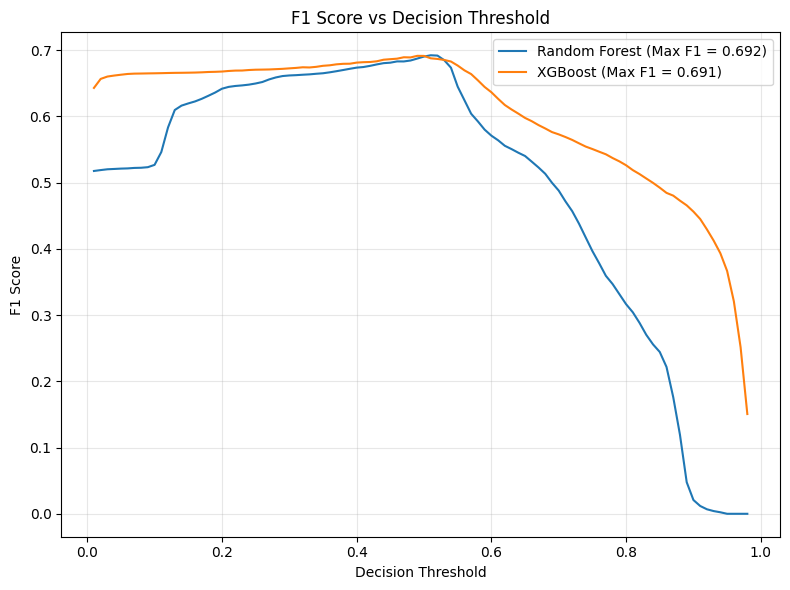

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
summary_data = []

plt.figure(figsize=(8, 6))

for name, model in models.items():
    print(f"Running threshold optimization for {name}...")

    scores, best_f1, best_threshold = threshold_optimization(
        model, X_test, y_test, thresholds
    )

    summary_data.append({
        "Model": name,
        "Max F1 Score": best_f1,
        "Optimal Threshold": best_threshold
    })

    plt.plot(
        thresholds,
        scores,
        label=f"{name} (Max F1 = {best_f1:.3f})"
    )

plt.title("F1 Score vs Decision Threshold")
plt.xlabel("Decision Threshold")
plt.ylabel("F1 Score")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
threshold_results_df = (
    pd.DataFrame(summary_data)
    .sort_values("Max F1 Score", ascending=False)
    .reset_index(drop=True)
)

display(threshold_results_df)

winner = threshold_results_df.iloc[0]
print("🏆 FINAL MODEL SELECTION")
print(f"Model: {winner['Model']}")
print(f"Best F1 Score: {winner['Max F1 Score']:.4f}")
print(f"Optimal Threshold: {winner['Optimal Threshold']:.2f}")

,Model,Max F1 Score,Optimal Threshold
0,Random Forest,0.692116,0.51
1,XGBoost,0.691233,0.49


🏆 FINAL MODEL SELECTION
Model: Random Forest
Best F1 Score: 0.6921
Optimal Threshold: 0.51


##### Based on threshold optimization, XGBoost achieved the highest F1 score among the evaluated models. The optimal decision threshold for XGBoost was found to be 0.49, slightly lower than the default threshold of 0.5. This adjustment improves the balance between precision and recall and results in the best overall classification performance for fatal incidents.

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
final_comparison = []

for _, row in threshold_results_df.iterrows():
    model_name = row["Model"]
    threshold = row["Optimal Threshold"]
    model = models[model_name]

    probs = model.predict_proba(X_test)[:, 1]
    preds = (probs >= threshold).astype(int)

    cm = confusion_matrix(y_test, preds)
    tn, fp, fn, tp = cm.ravel()

    final_comparison.append({
        "Model": model_name,
        "Optimal Threshold": threshold,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1 Score": f1_score(y_test, preds),
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TP": tp
    })

final_comparison_df = (
    pd.DataFrame(final_comparison)
    .sort_values("F1 Score", ascending=False)
    .reset_index(drop=True)
)

final_comparison_df

,Model,Optimal Threshold,Accuracy,Precision,Recall,F1 Score,TN,FP,FN,TP
0,Random Forest,0.51,0.724456,0.566992,0.888102,0.692116,5208,2970,490,3889
1,XGBoost,0.49,0.718404,0.559593,0.903859,0.691233,5063,3115,421,3958


#### After threshold optimization, XGBoost achieved the highest F1 score and recall, making it the preferred model for detecting fatal incidents despite slightly lower accuracy.

# ----------------------------------------------------------------------------------------------------------------------------

## Second Part - Clustering Analysis – Unsupervised Learning on Crime Data

### Imports & Setup

In [44]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Section 1 - Baseline: Clustering on Full Dataset

#### 1.1 Data Preparation

In [ ]:
#df_cluster = df_model.drop(columns=["y_fatal","STATE_SENATE_DISTRICT","STATE_HOUSE_DISTRICT","DISTRICT","AREA"])
df_cluster = df_model.drop(columns=["y_fatal"])

In [46]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62782 entries, 0 to 62781
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   COMMUNITY_AREA         62757 non-null  object 
 1   AREA                   62757 non-null  object 
 2   DISTRICT               62757 non-null  object 
 3   AGE                    62782 non-null  object 
 4   SEX                    62782 non-null  object 
 5   RACE                   62782 non-null  object 
 6   MONTH                  62782 non-null  int64  
 7   DAY_OF_WEEK            62782 non-null  int64  
 8   HOUR                   62782 non-null  int64  
 9   LOCATION_DESCRIPTION   62782 non-null  object 
 10  STATE_HOUSE_DISTRICT   62755 non-null  object 
 11  STATE_SENATE_DISTRICT  62755 non-null  object 
 12  LATITUDE               62757 non-null  float64
 13  LONGITUDE              62757 non-null  float64
dtypes: float64(2), int64(3), object(9)
memory usage: 6.7+ 

#### 1.2 Feature Type Identification + Preprocessing Pipeline

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
numeric_features = df_cluster.select_dtypes(include=["int64", "float64"]).columns
categorical_features = df_cluster.select_dtypes(include=["object"]).columns

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])
categorical_features
numeric_features
unique_counts = df_model[categorical_features].nunique().sort_values(ascending=False)

unique_counts

COMMUNITY_AREA           77
STATE_HOUSE_DISTRICT     35
LOCATION_DESCRIPTION     30
DISTRICT                 22
STATE_SENATE_DISTRICT    20
AGE                       9
RACE                      7
AREA                      5
SEX                       3
dtype: int64

#### 1.3 PCA – Explained Variance

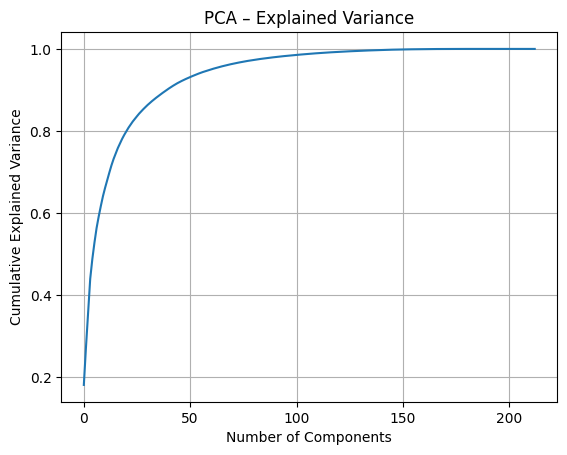

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
X_prepared = preprocessor.fit_transform(df_cluster)

pca = PCA()
X_pca = pca.fit_transform(X_prepared)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA – Explained Variance")
plt.grid()
plt.show()

##### The explained variance curve indicates that the full dataset is high-dimensional, making clustering less effective at this stage.

#### 1.4 Elbow Method

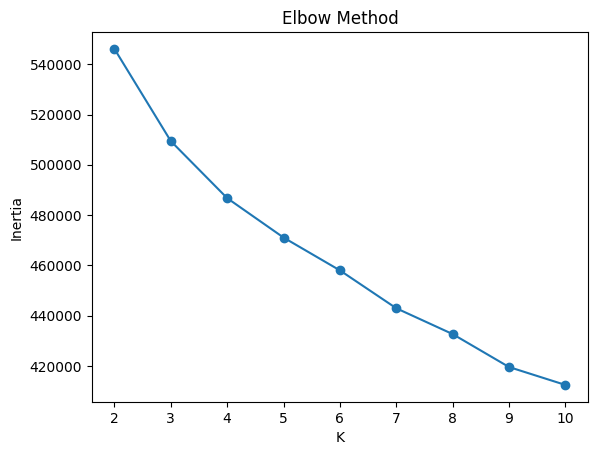

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
inertia = []
K_range = range(2, 11)

for k in K_range:
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("pca", PCA(n_components=0.9)),
        ("kmeans", KMeans(n_clusters=k, random_state=42))
    ])
    pipe.fit(df_cluster)
    inertia.append(pipe.named_steps["kmeans"].inertia_)

plt.plot(K_range, inertia, marker="o")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

#### 1.5 Silhouette Analysis

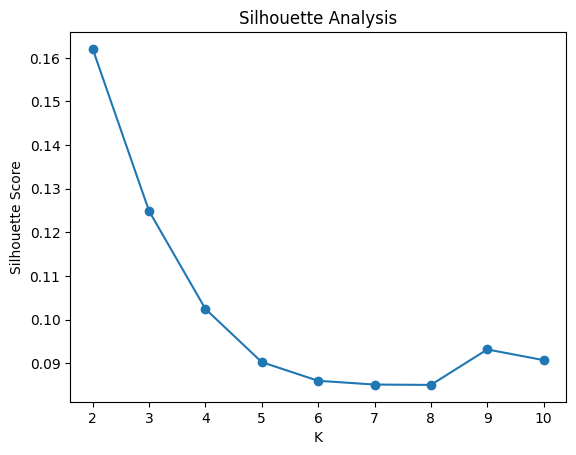

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
sil_scores = []

for k in K_range:
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("pca", PCA(n_components=0.9)),
        ("kmeans", KMeans(n_clusters=k, random_state=42))
    ])
    labels = pipe.fit_predict(df_cluster)
    X_pca = pipe.named_steps["pca"].transform(
        pipe.named_steps["preprocessor"].transform(df_cluster)
    )
    sil_scores.append(silhouette_score(X_pca, labels))

plt.plot(K_range, sil_scores, marker="o")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

##### Both the Elbow method and the Silhouette analysis indicate the absence of a clear optimal number of clusters, suggesting that clustering the full dataset does not produce well-separated or meaningful groups.

#### 1.6 Full Dataset Clustering Result

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
final_k = 4

final_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("pca", PCA(n_components=0.9)),
    ("kmeans", KMeans(n_clusters=final_k, random_state=42))
])

df_cluster["cluster"] = final_pipe.fit_predict(df_cluster)

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
df_cluster.groupby("cluster").agg({
    "HOUR": "mean",
    "MONTH": "mean",
    "LATITUDE": "mean",
    "LONGITUDE": "mean",
    "AGE": lambda x: x.value_counts().index[0],
    "SEX": lambda x: x.value_counts().index[0]
})

,HOUR,MONTH,LATITUDE,LONGITUDE,AGE,SEX
cluster,,,,,,
0,13.291449,6.828095,41.892068,-87.716554,20-29,M
1,13.303789,6.774803,41.722284,-87.613859,20-29,M
2,13.489775,6.733190,41.787241,-87.642778,20-29,M
3,10.894056,6.781155,41.890942,-87.714563,20-29,M


In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
pd.crosstab(
    df_cluster["cluster"],
    df["VICTIMIZATION_PRIMARY"],
    normalize="index"
)

VICTIMIZATION_PRIMARY,BATTERY,CRIMINAL SEXUAL ASSAULT,HOMICIDE,NON-FATAL,PUBLIC PEACE VIOLATION,ROBBERY
cluster,,,,,,
0,0.607535,0.000000,0.354927,0.004461,0.000000,0.033077
1,0.617887,0.000134,0.343286,0.004619,0.000000,0.034074
2,0.619912,0.000050,0.344872,0.006634,0.000000,0.028532
3,0.607910,0.000000,0.353826,0.005369,0.000076,0.032819


##### K-Means clustering was applied to the full dataset after PCA-based dimensionality reduction. The Elbow and Silhouette analyses did not indicate a clear cluster structure, and the resulting clusters were highly similar and difficult to interpret. This demonstrates that clustering on the entire dataset does not yield meaningful group separation.

# -----------------------------------------------------------------------------

### Section 2 – Mixed Time & Location Clustering

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
# Preprocessing function for a specific demographic group (Males aged 20–29)
def prepare_males_20_29(df):
    df_out = df[
        (df["SEX"] == "M") &
        (df["AGE"] == "20-29")
    ].copy()

    df_out["is_night"] = ((df_out["HOUR"] >= 22) | (df_out["HOUR"] <= 4)).astype(int)
    df_out["is_weekend"] = df_out["DAY_OF_WEEK"].isin([1, 6, 7]).astype(int)

    return df_out

### 2.1 Population Filtering

In [55]:
df_km = prepare_males_20_29(df_cluster)

#### 2.2 Feature Matrix

In [56]:
features = [
    "HOUR",
    "MONTH",
    "is_night",
    "is_weekend",
    "LATITUDE",
    "LONGITUDE"
]

X = df_km[features].dropna()

#### 2.3 Scaling + PCA + KMeans

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.9, random_state=42)
X_pca = pca.fit_transform(X_scaled)

inertia = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_pca)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_pca, labels))

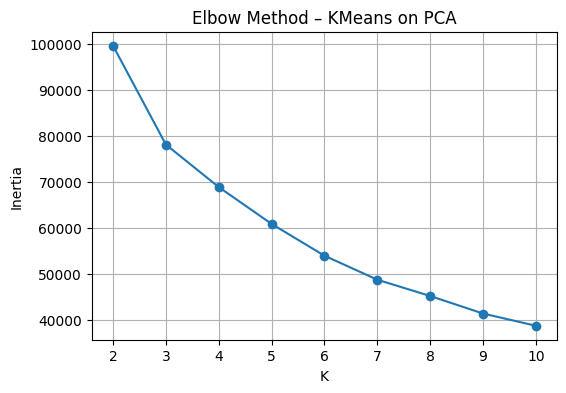

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Method – KMeans on PCA")
plt.grid()
plt.show()

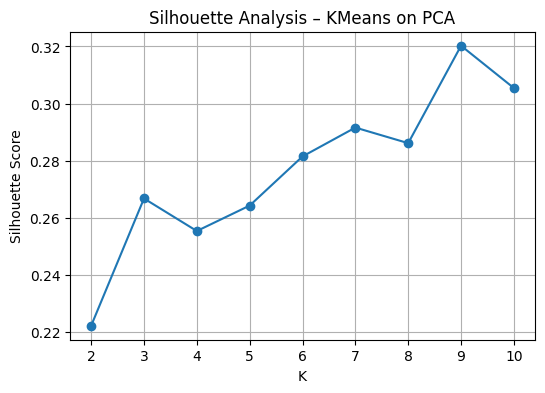

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, marker="o")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis – KMeans on PCA")
plt.grid()
plt.show()

#### After filtering the population and applying PCA, both the Elbow method and Silhouette scores indicate a clearer and more stable clustering structure compared to clustering on the full dataset.

#### 2.4 Visualization

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
final_k = 3

kmeans = KMeans(n_clusters=final_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

df_km.loc[X.index, "cluster"] = labels

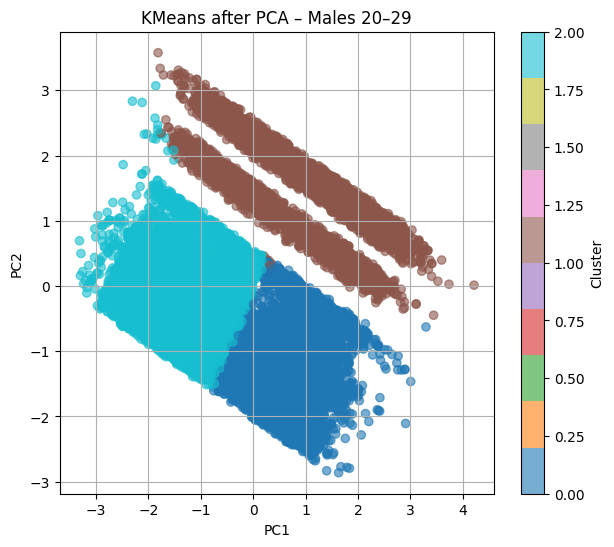

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
plt.figure(figsize=(7,6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=labels,
    cmap="tab10",
    alpha=0.6
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans after PCA – Males 20–29")
plt.colorbar(label="Cluster")
plt.grid()
plt.show()

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
df_km.loc[X.index].groupby("cluster").agg({
    "HOUR": "mean",
    "MONTH": "mean",
    "is_night": "mean",
    "is_weekend": "mean",
    "LATITUDE": "mean",
    "LONGITUDE": "mean"
})

,HOUR,MONTH,is_night,is_weekend,LATITUDE,LONGITUDE
cluster,,,,,,
0,16.877795,6.711984,0.211776,0.467435,41.886728,-87.718648
1,1.633072,6.837809,0.998189,0.663398,41.829269,-87.672602
2,17.060382,6.763329,0.200905,0.440115,41.756837,-87.628028


##### The clustering reveals a stronger and more stable separation between groups. however, assigning clear semantic labels remains challenging, since the clusters combine both spatial and temporal behavior patterns rather than representing a single dominant dimension.

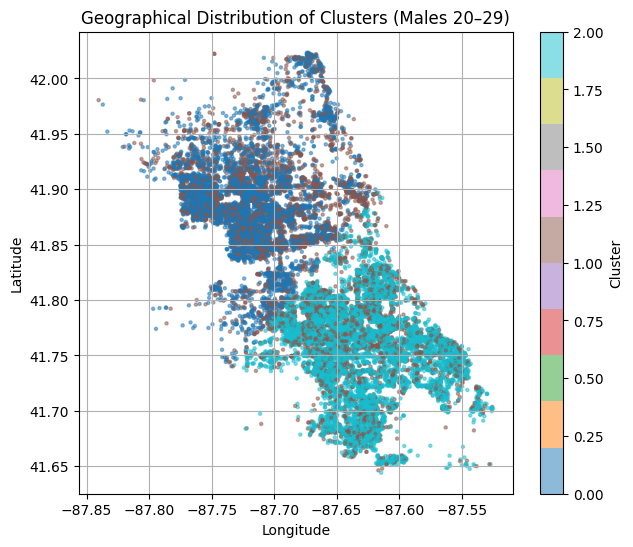

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
plt.figure(figsize=(7,6))
plt.scatter(
    df_km["LONGITUDE"],
    df_km["LATITUDE"],
    c=df_km["cluster"],
    cmap="tab10",
    alpha=0.5,
    s=5
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Clusters (Males 20–29)")
plt.colorbar(label="Cluster")
plt.grid()
plt.show()

##### The spatial distribution shows partial geographic grouping, but with significant overlap, reinforcing that the clusters reflect a combination of behavioral and geographic factors.

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
df_night = df_km[df_km["cluster"] == 1].copy()
X_geo = df_night[["LATITUDE", "LONGITUDE"]].dropna()
X_geo_scaled = StandardScaler().fit_transform(X_geo)
for k in [2, 3]:
    labels = KMeans(n_clusters=k, random_state=42, n_init=10)\
        .fit_predict(X_geo_scaled)
    print(k, pd.Series(labels).value_counts())

2 1    3510
0    3118
Name: count, dtype: int64
3 1    2741
2    2021
0    1866
Name: count, dtype: int64


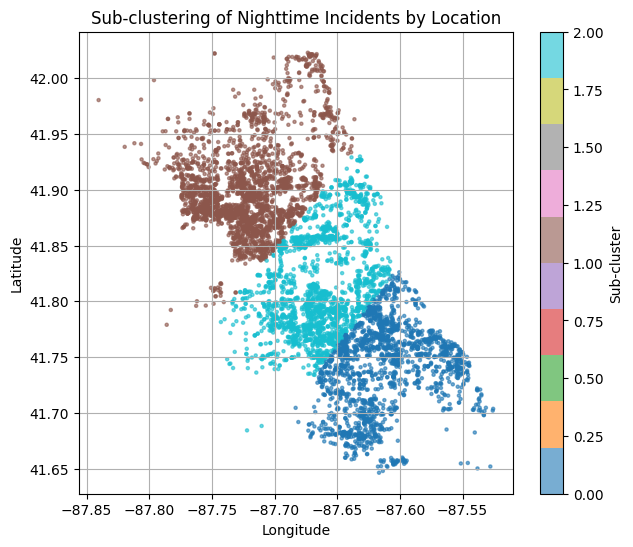

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
df_night["sub_cluster"] = labels

plt.figure(figsize=(7,6))
plt.scatter(
    df_night["LONGITUDE"],
    df_night["LATITUDE"],
    c=df_night["sub_cluster"],
    cmap="tab10",
    alpha=0.6,
    s=5
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Sub-clustering of Nighttime Incidents by Location")
plt.colorbar(label="Sub-cluster")
plt.grid()
plt.show()

##### This further supports the notion that the clusters in this section combine both behavioral and geographic factors, limiting their interpretability.

### ------------------------------------------------------------------------------------------------------------------------------------------------

### Section 3 – Geographical Clustering 

In [ ]:
df_geo = df[["LATITUDE", "LONGITUDE"]].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_geo)

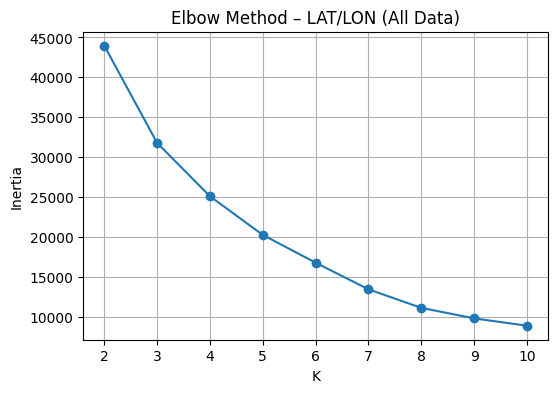

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Method – LAT/LON (All Data)")
plt.grid()
plt.show()

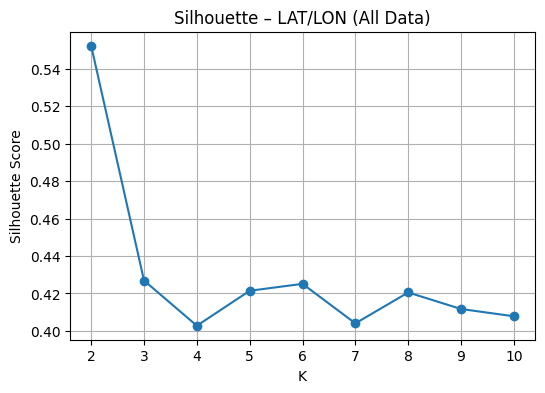

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
sil_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, marker="o")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette – LAT/LON (All Data)")
plt.grid()
plt.show()

##### The Elbow and Silhouette results indicate that spatial clustering based solely on latitude and longitude forms well-separated geographic regions. However, these clusters primarily reflect physical location rather than meaningful temporal or behavioral patterns.

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
k_final = 3

kmeans = KMeans(n_clusters=k_final, random_state=42, n_init=10)
df_geo["cluster"] = kmeans.fit_predict(X_scaled)

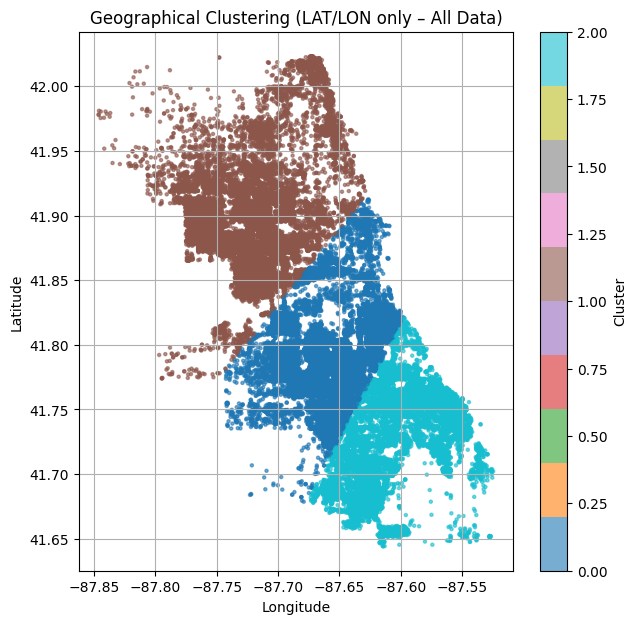

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
plt.figure(figsize=(7,7))
plt.scatter(
    df_geo["LONGITUDE"],
    df_geo["LATITUDE"],
    c=df_geo["cluster"],
    cmap="tab10",
    s=5,
    alpha=0.6
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Clustering (LAT/LON only – All Data)")
plt.colorbar(label="Cluster")
plt.grid()
plt.show()

##### The resulting clusters clearly divide the city into distinct geographic regions, driven purely by spatial proximity. While this clustering is strong from a geometric perspective, it does not capture temporal or behavioral dynamics and therefore has limited explanatory value for incident patterns.

### ----------------------------------------------------------------------------------------------------------------------

### Section 4 – Final Temporal Behavioral Clustering

### 4.1 Population Filtering

In [71]:
df_tmp = prepare_males_20_29(df)

### 4.2 Temporal Categorization

In [72]:
def time_bin(hour):
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    elif 18 <= hour < 22:
        return "Evening"
    else:
        return "Late_Night"

df_tmp["time_bin"] = df_tmp["HOUR"].apply(time_bin)

In [73]:
def season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df_tmp["season"] = df_tmp["MONTH"].apply(season)

### 4.3 Feature Selection for Clustering

In [74]:
features = [
    "HOUR",
    "is_night",
    "is_weekend"
]

X = df_tmp[features]

### 4.4 Scaling + PCA 

In [75]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

### 4.5 Elbow + Silhouette

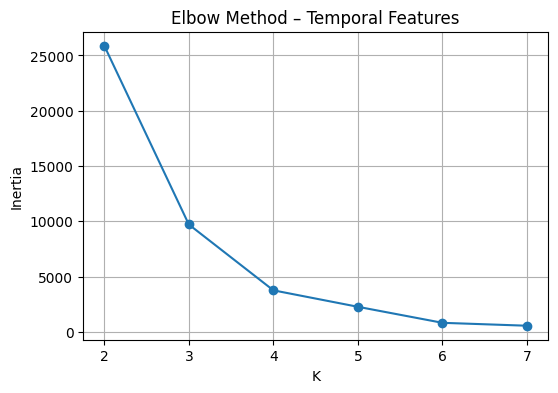

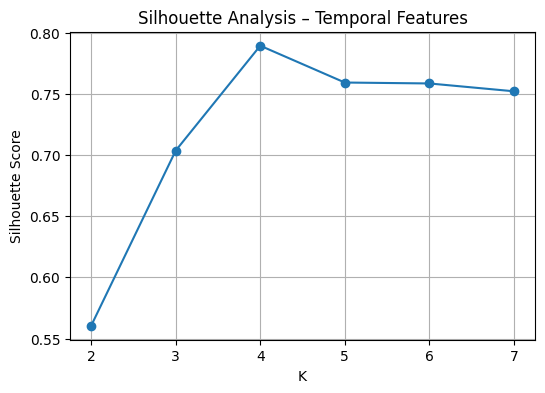

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
inertia = []
sil_scores = []
K_range = range(2, 8)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_pca)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_pca, labels))

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Method – Temporal Features")
plt.grid()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, marker="o")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis – Temporal Features")
plt.grid()
plt.show()

##### The Elbow curve shows a clear stabilization point, suggesting that a small number of clusters is sufficient to capture the main temporal patterns in the data. At the same time, the Silhouette scores remain relatively high, indicating that the resulting clusters are well separated and internally consistent when using temporal features only.

### 4.6 KMeans

In [77]:
kmeans = KMeans(
    n_clusters=4,
    random_state=42,
    n_init=10
)

df_tmp["cluster"] = kmeans.fit_predict(X_pca)

### 4.7 Cluster Visualization

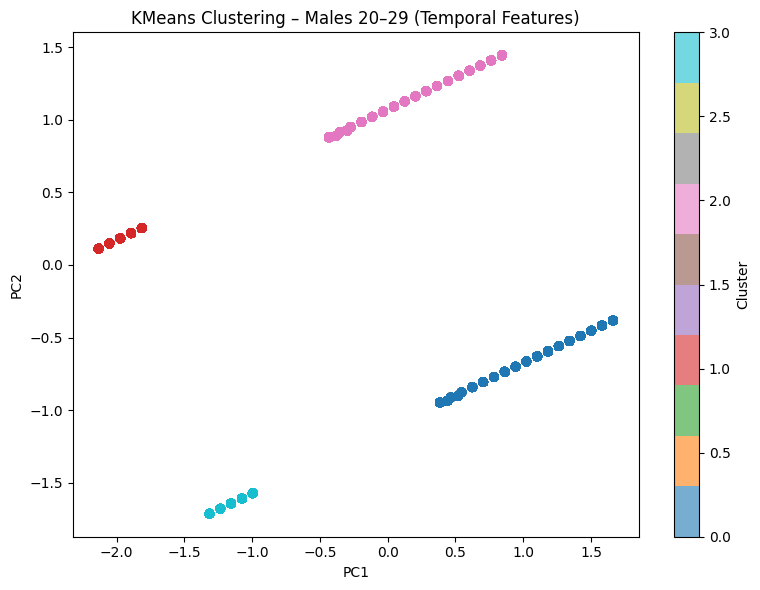

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=df_tmp["cluster"],
    cmap="tab10",
    alpha=0.6
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clustering – Males 20–29 (Temporal Features)")
plt.colorbar(label="Cluster")
plt.tight_layout()
plt.show()

##### The PCA projection shows a clear separation between clusters, indicating that temporal features alone are sufficient to distinguish distinct behavioral patterns within the selected population.

### 4.8 Cluster Profiling – Numerical Summary

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
df_tmp.groupby("cluster")[[
    "HOUR",
    "is_night",
    "is_weekend"
]].mean()

,HOUR,is_night,is_weekend
cluster,,,
0,17.137555,0.185019,0.0
1,1.769038,1.000000,1.0
2,16.806189,0.228284,1.0
3,1.358382,1.000000,0.0


##### The cluster-level averages highlight distinct temporal profiles, separating daytime versus nighttime activity and weekday versus weekend patterns, which supports the interpretability of the temporal clustering results.

### 4.9 Cluster Interpretation – Temporal & Seasonal Context

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
pd.crosstab(
    df_tmp["cluster"],
    df_tmp["time_bin"],
    normalize="index"
)

time_bin,Afternoon,Evening,Late_Night,Morning
cluster,,,,
0,0.329322,0.355753,0.196941,0.117984
1,0.000000,0.000000,1.000000,0.000000
2,0.297910,0.301982,0.274023,0.126086
3,0.000000,0.000000,1.000000,0.000000


##### The clusters show clear separation by time of day, with some clusters dominated entirely by late-night incidents, while others are spread across afternoon and evening hours.

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
pd.crosstab(
    df_tmp["cluster"],
    df_tmp["season"],
    normalize="index"
)

season,Fall,Spring,Summer,Winter
cluster,,,,
0,0.258351,0.258914,0.296592,0.186143
1,0.242590,0.222298,0.374829,0.160283
2,0.255293,0.239685,0.320847,0.184175
3,0.224989,0.222766,0.409960,0.142285


##### Seasonal distributions are relatively similar across clusters, suggesting that seasonality plays a secondary role compared to temporal patterns such as hour and night/weekend indicators.

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
pd.crosstab(
    df_tmp["cluster"],
    df_tmp["VICTIMIZATION_PRIMARY"],
    normalize="index"
)

VICTIMIZATION_PRIMARY,BATTERY,HOMICIDE,NON-FATAL,ROBBERY
cluster,,,,
0,0.632662,0.331796,0.004274,0.031268
1,0.624031,0.344049,0.006156,0.025764
2,0.638844,0.328040,0.004207,0.028909
3,0.556247,0.398844,0.004446,0.040462


##### All clusters are dominated by battery incidents, with consistent proportions of homicide and robbery across clusters, indicating that clustering is driven mainly by temporal behavior rather than crime type.

### 4.10 Cluster Size Distribution

In [ ]:
# This code was generated with the assistance of AI tools (ChatGPT and Gemini)
counts = df_tmp["cluster"].value_counts().sort_index()
percentages = df_tmp["cluster"].value_counts(normalize=True).sort_index() * 100

cluster_distribution = pd.DataFrame({
    "count": counts,
    "percentage": percentages.round(2)
})

cluster_distribution

,count,percentage
cluster,,
0,8891,38.84
1,4386,19.16
2,7368,32.18
3,2249,9.82


##### The cluster distribution is relatively balanced, with no single cluster dominating the dataset, indicating a meaningful partition of the data into distinct temporal behavior groups.

#### This temporal clustering provided the most interpretable and stable segmentation in the analysis. By focusing on time-based features, the model successfully separated incidents into clearly distinguishable behavioral patterns that could be explicitly described and compared. Unlike previous sections, the resulting clusters were both well-balanced and intuitively meaningful, allowing each cluster to be associated with a concrete temporal profile such as late-night activity or daytime incidents. This makes the temporal clustering particularly valuable for understanding underlying behavioral dynamics and for supporting actionable insights.